<a href="https://colab.research.google.com/github/roldugina/data_analysis_projects/blob/main/Housing_price_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loading the dataset and importing libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df=pd.read_csv("https://raw.githubusercontent.com/roldugina/data_analysis_projects/main/Homes%20for%20Sale%20and%20Real%20Estate.csv")

## 2. General dataset overview. Data cleaning (checking for missing values and anomalies)

In [70]:
df.shape

(3360, 8)

In [71]:
df.head()

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles


In [72]:
df.describe()

,Price,Beds,Bath,Sq.Ft
count,3.360000e+03,3360.000000,3360.000000,3360.000000
mean,7.500648e+05,3.125000,2.479167,1558.815179
std,6.447619e+05,1.349087,1.023546,1056.424307
min,1.419000e+05,1.000000,1.000000,307.000000
25%,3.990000e+05,2.000000,2.000000,933.000000
50%,6.199000e+05,3.000000,2.500000,1352.000000
75%,8.499220e+05,4.000000,3.500000,2023.250000
max,1.000000e+07,10.000000,8.000000,39654.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      3360 non-null   object 
 1   Price        3360 non-null   int64  
 2   Description  3360 non-null   object 
 3   Place        3344 non-null   object 
 4   Beds         3360 non-null   int64  
 5   Bath         3360 non-null   float64
 6   Sq.Ft        3360 non-null   int64  
 7   Website      3359 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 210.1+ KB


We can see that there are 2 columns with missing values: Place and Website. These variables are categorical and we cannot fill them, so we'll drop these rows.

Checking variables types.
It is correct that all categorical columns (Address, Description, Place, Website) have object type. Price, Beds, Sq.Ft have integer type.

Bath column has float type, and we have to check this column in further analysis.


## 3. Cleaning the dataset

In [74]:
df['Bath'].unique()

array([3.5, 2. , 2.5, 1. , 3. , 1.5, 4.5, 5. , 6.5, 4. , 5.5, 6. , 7.5,
       8. ])

**Cleaning null values** (rows with null Place and Website columns). Dropped 17 rows.

In [75]:
df_cleaned=df.dropna()

In [76]:
len(df_cleaned)-len(df)

-17

**Cleaning not null values**

Checking for duplicates

In [77]:
df_cleaned['Address'].duplicated().any()

False

There are no duplicated addresses

Checking Bath column.

In [78]:
df_cleaned['Bath'].unique()

array([3.5, 2. , 2.5, 1. , 3. , 1.5, 4.5, 5. , 6.5, 4. , 5.5, 6. , 7.5,
       8. ])

 There are float values like 3.5, 4.5 etc. Domain knowledge tell us that such values are valid (there are houses with full bathrooms and half-bathrooms).

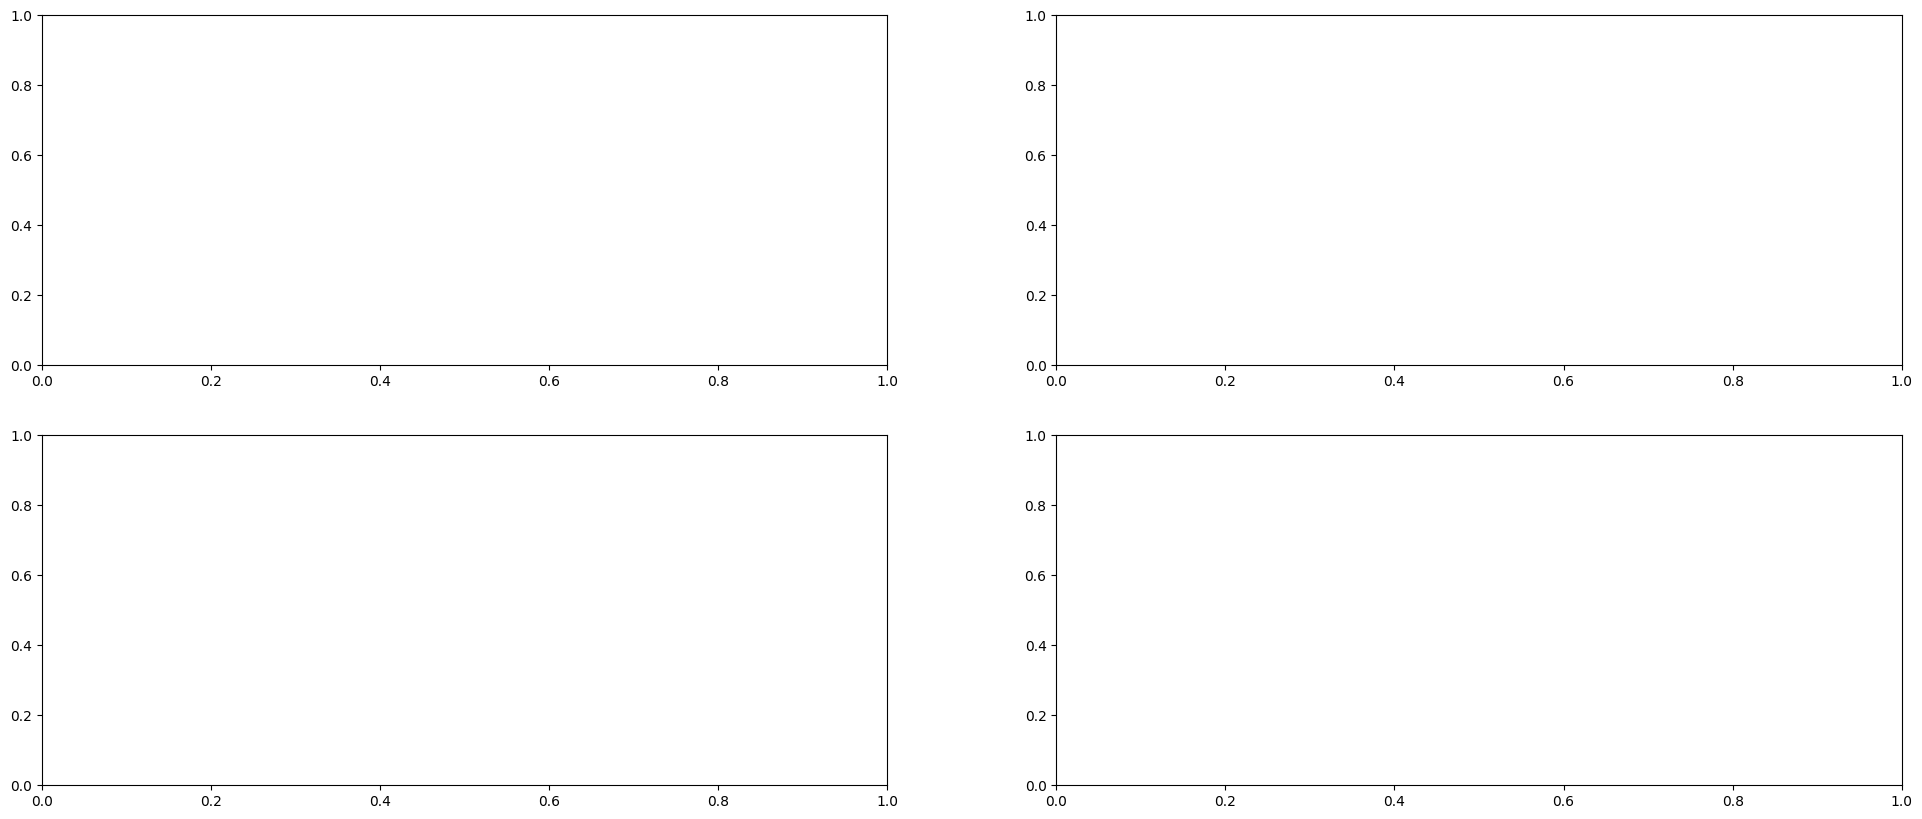

In [79]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(24, 10))
fig,((ax1,ax2),(ax3,ax4))=plot_objects

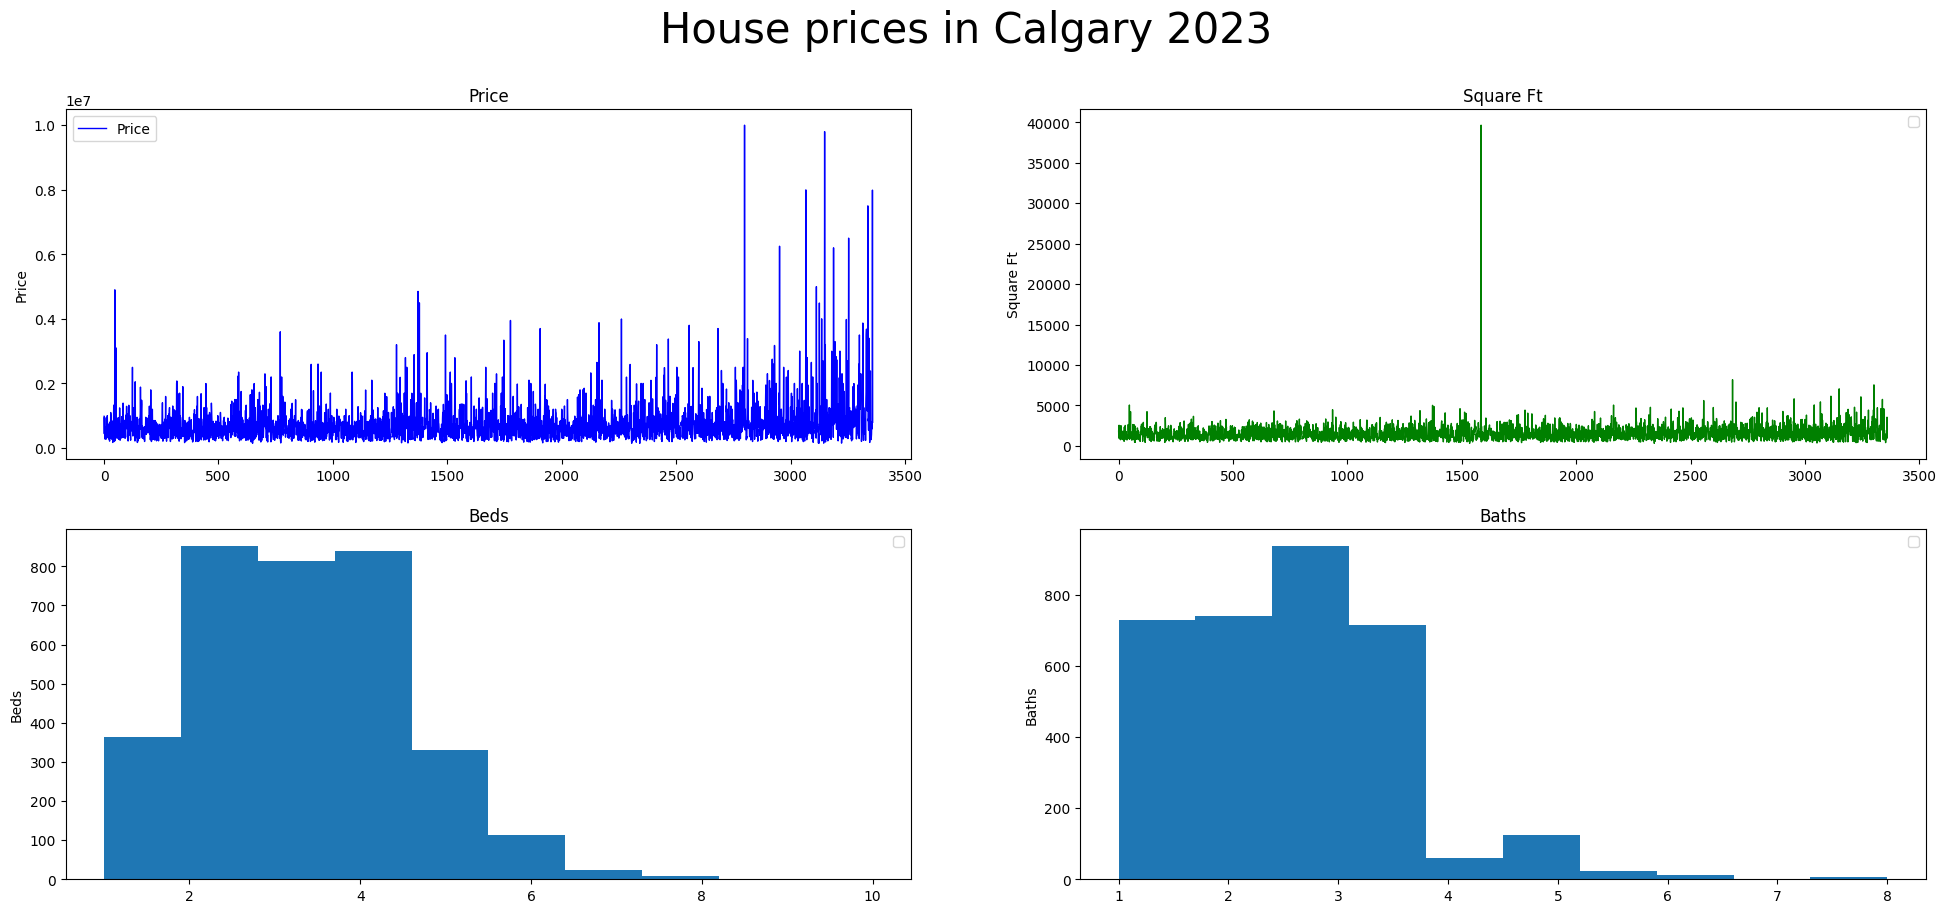

In [80]:
ax1.plot(df_cleaned['Price'],color='blue',linewidth=1,label='Price')
ax2.plot(df_cleaned['Sq.Ft'],color='green',linewidth=1)
ax3.hist(df_cleaned['Beds'],bins=10)
ax4.hist(df_cleaned['Bath'],bins=10)


ax1.set_ylabel('Price')
ax2.set_ylabel('Square Ft')
ax3.set_ylabel('Beds')
ax4.set_ylabel('Baths')

ax1.set_title("Price")
ax2.set_title("Square Ft")
ax3.set_title("Beds")
ax4.set_title("Baths")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.suptitle('House prices in Calgary 2023',fontsize=30)

fig

The data seems to have no significant outliers with the exception of huge spike in Sg Ft column.

Locating the outlier:

In [81]:
max_sqft=df_cleaned['Sq.Ft'].max()
max_sqft

39654

In [82]:
mask=df_cleaned['Sq.Ft']==df_cleaned['Sq.Ft'].max()
df_cleaned.loc[mask]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
1584,2012 3 Ave NW,1695000,CA AB T2N 0K2,West Hillhurst,4,3.5,39654,Cir Realty


Seems that we have a fat finger error. Let's drop the row containing this value.

In [83]:
df_cleaned=df_cleaned.drop(df_cleaned.loc[mask].index)

Checking the plot, no spikes.

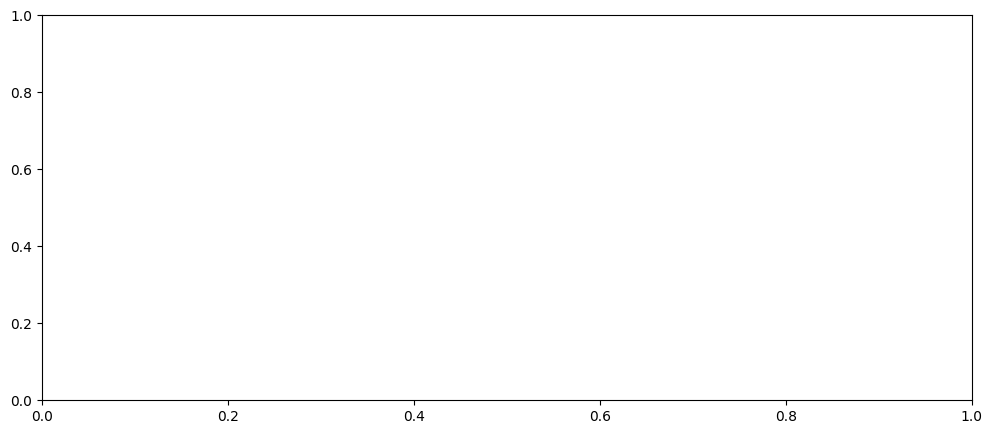

In [94]:
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
fig,ax=plot_objects

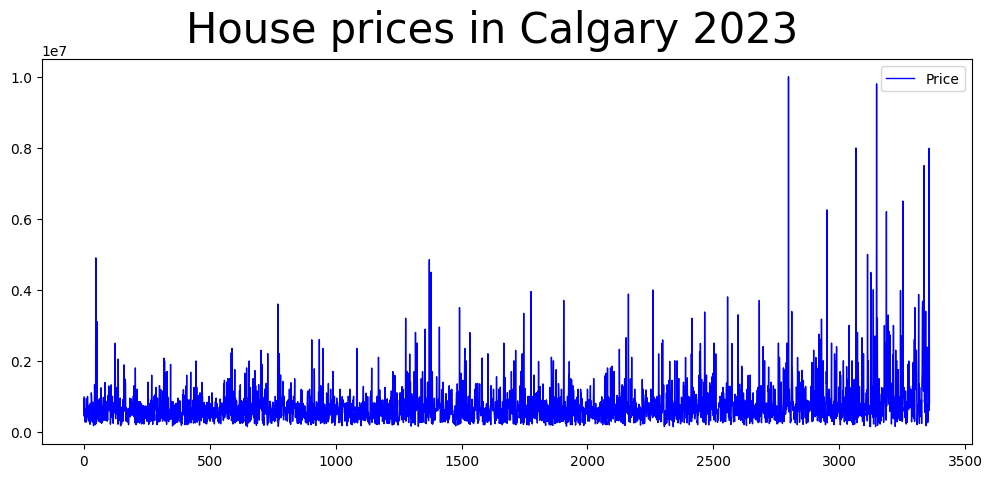

In [95]:
ax.plot(df_cleaned['Price'],color='blue',linewidth=1,label='Price')
ax.legend()
fig.suptitle('House prices in Calgary 2023',fontsize=30)
fig

Now the data seems to be clean.

## 4. Exploratory data analysis

In [96]:
df['Price_per_square']=df['Price']/df['Sq.Ft']
df['Avg_bed']=df['Sq.Ft']/df['Beds']

In [87]:
price_upper_limit=df['Price usd per square'].mean()+3*df['Price usd per square'].std()
price_lower_limit=df['Price usd per square'].mean()-2*df['Price usd per square'].std()

In [88]:
mask_price=df['Price usd per square']>price_upper_limit

In [89]:
df_cleaned.loc[mask_price]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
461,423 11 St NW,1099000,CA AB T2N 1X5,Hillhurst,5,3.0,962,Stratten Gates Real Estate Ltd.
770,918 Crescent Rd NW,3599000,CA AB T2M 4A8,Rosedale,3,4.5,2217,RE/MAX Real Estate (Central)
791,839 Mcpherson Rd NE,849900,CA AB T2Z 4Z6,Bridgeland/Riverside,3,2.0,720,CA West Realty
1323,45 Aspen Acres Manor SW,2500000,CA AB T3H 0W5,Aspen Woods,1,1.0,950,Comox Realty
1639,3940 1A St SW,1550000,CA AB T2S 1R7,Parkhill,2,1.5,1027,Charles
1668,6407 58 St NW,2499000,CA AB T3A4R5,Dalhousie,2,2.0,2056,RE/MAX House Of Real Estate
2127,3030 17 St SW #302,2325000,CA AB T2T 6X3,South CA,2,2.5,1939,Sotheby's International Realty Canada
2327,8539 48 Ave NW,1985000,CA AB T3B 2B1,Bowness,4,1.5,1500,RE/MAX Realty Professionals
2347,1208 39 Ave SW,2000000,CA AB T2T 2K5,Elbow Park,3,2.0,1649,CA West Realty
2359,333 39 Ave SW,1245000,CA AB T2S 0W8,Elbow Park,2,1.0,930,Stratten Gates Real Estate Ltd.


In [90]:
mask_beds=df_cleaned['Beds']==1

In [91]:
df_cleaned[mask_beds]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
22,1805 26 Ave SW #302,269000,CA AB T2T 1E2,South CA,1,1.0,707,Exp Realty
24,215 25 Ave SW #403,212000,CA AB T2S 0L2,Mission,1,1.0,563,Real Estate Professionals Inc.
58,222 Riverfront Ave SW #414,469000,CA AB T2P 0X2,Chinatown,1,1.0,700,Grand Realty
72,310 12 Ave SW #2604,279900,CA AB T2R 1B5,Beltline,1,1.0,445,RE/MAX Realty Professionals
94,225 11 Ave SE #1909,330000,CA AB T2G 0G3,Beltline,1,1.0,549,Coldwell Banker Mountain Central
...,...,...,...,...,...,...,...,...
3310,221 6 Ave SE #1905,201999,CA AB T2G 4Z9,Downtown Commercial Core,1,1.0,767,E-Trinity Realty And Management Ltd
3313,47 34 Ave SW,749900,CA AB T2S 2Y9,Parkhill,1,1.0,689,Purpose Realty
3319,2727 28 Ave SE #109,234900,CA AB T2B 0L4,Dover,1,1.0,571,Stratten Gates Real Estate Ltd.
3328,226 Village Terrace SW #5,234000,CA AB T3H2L4,Patterson,1,1.0,542,Cir Realty


In [92]:
df_cleaned['Price usd per square'].sort_values(ascending=False)

KeyError: 'Price usd per square'

In [ ]:
df_cleaned['Avg beds'].sort_values(ascending=False)

In [ ]:
df['Sq.Ft'].plot(figsize=[16,9])

In [ ]:
mask_max_beds=df_cleaned['Avg beds']==df_cleaned['Avg beds'].max()

In [ ]:
df_cleaned.loc[mask_max_beds]

In [ ]:
df_cleaned.loc[1584,'Sq.Ft']=df_cleaned.loc[1584,'Sq.Ft']=3684

In [ ]:
df_cleaned.describe()

In [ ]:
df_cleaned['Price usd']=df_cleaned['Price']/1.33
df_cleaned['Avg beds']=df_cleaned['Sq.M']/df_cleaned['Beds']
df_cleaned['Sq.M']=df_cleaned['Sq.Ft']/10.764
df_cleaned['Price usd per square']=df_cleaned['Price usd']/df_cleaned['Sq.M']

In [ ]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(24, 10))
fig,((ax1,ax2),(ax3,ax4))=plot_objects

In [ ]:
ax1.plot(df_cleaned['Price'],color='blue',linewidth=1,label='Price')
ax2.plot(df_cleaned['Sq.Ft'],color='green',linewidth=1)
ax3.hist(df_cleaned['Avg beds'],bins=100)
ax4.hist(df_cleaned['Beds'],bins=10)


ax1.set_ylabel('Price')
ax2.set_ylabel('Square Ft')

ax1.set_title("Price")
ax2.set_title("Square Ft")
ax1.legend()

fig.suptitle('House prices in Calgary 2023',fontsize=30)

fig